#  <center> ~ Decision Tree Classification in Python ~



***
##### <center> <font color="blue"> Préparer par Hajer Mhimdi
***

### <font color="red">Un arbre de décision : <br> 
d'après Wikipédia, il est un outil d'aide à la décision représentant un ensemble de choix sous la forme graphique d'un arbre. Les différentes décisions possibles sont situées aux extrémités des branches (les « feuilles » de l'arbre), et sont atteintes en fonction de décisions prises à chaque étape. L'arbre de décision est un outil utilisé dans des domaines variés tels que la sécurité, la fouille de données, la médecine, etc. Il a l'avantage d'être lisible et rapide à exécuter. Il s'agit de plus d'une représentation calculable automatiquement par des algorithmes d'apprentissage supervisé.

***
## Importing Required Libraries

In [1]:
!pip install graphviz


In [2]:
!pip install pydotplus

In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Loading Data

Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function.

You can download the data [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names).drop([0])

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


### Loding data from guithub

In [6]:
import pandas as pd
import io
import requests
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
c = pd.read_csv("https://raw.githubusercontent.com/nevermind78/DM/master/TP4/diabetes.csv", header=None, names=col_names).drop([0])


In [7]:
c.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


### The output should be :
![alt text](pima.png)


### Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [8]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


Accuracy: 0.6753246753246753

### Visualizing Decision Trees
You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

`pip install graphviz`

`pip install pydotplus`

`export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.`

In [12]:
!pip install sklearn

In [13]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus



In [14]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

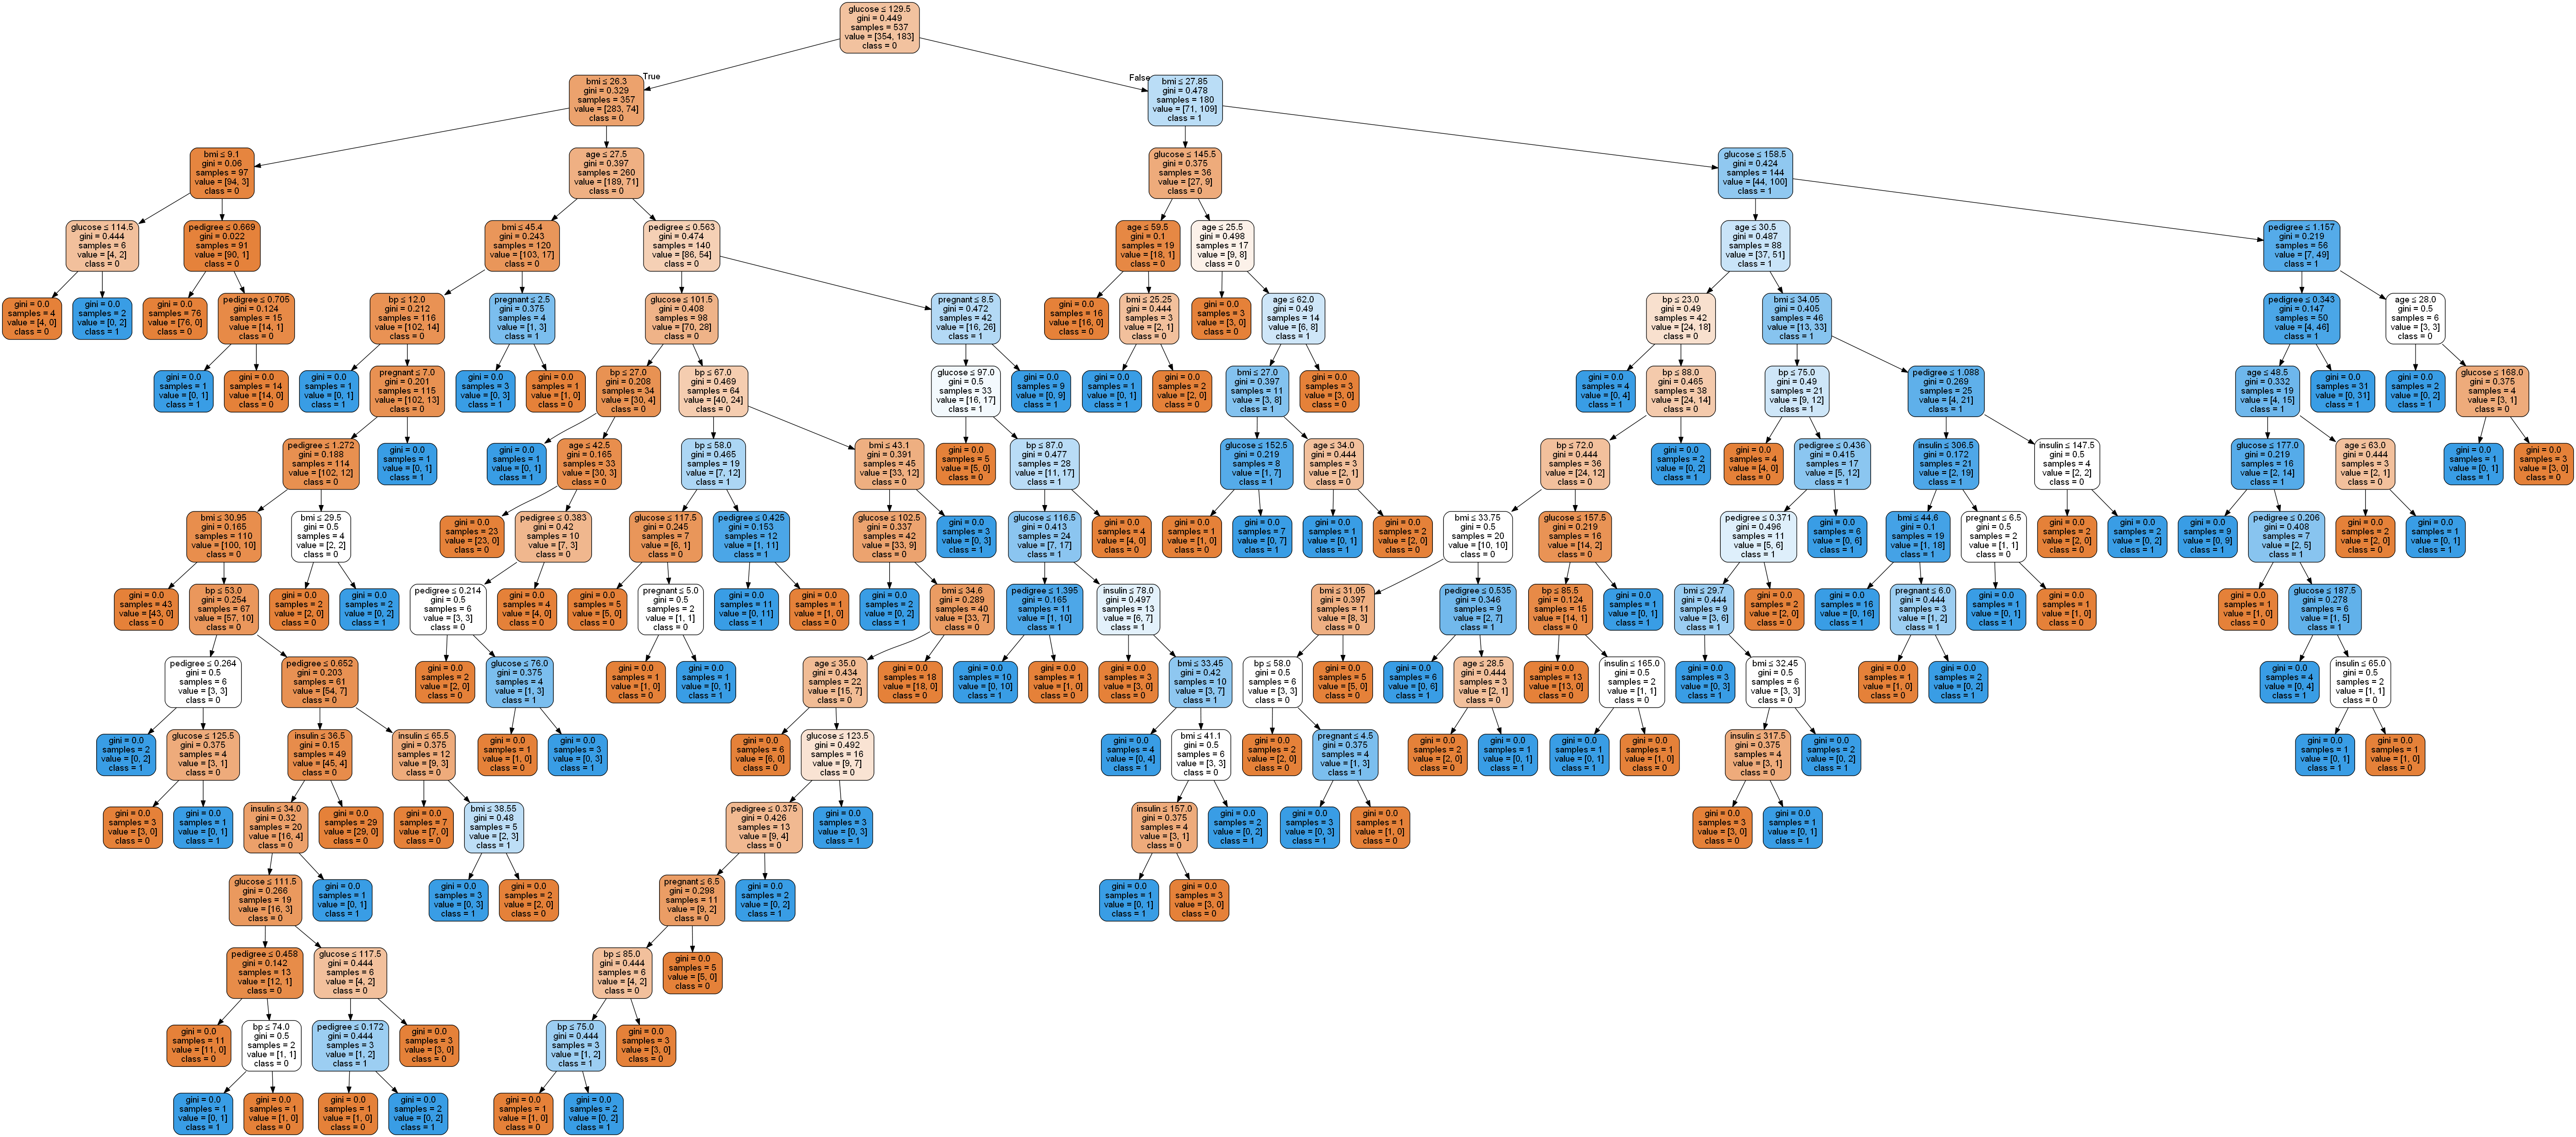

In [15]:

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### The output should be :
![alt text](output.jpg)


### Optimizing Decision Tree Performance
* **criterion :** `optional (default=”gini”) or Choose attribute selection measure`: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

* **splitter :** `string, optional (default=”best”) or Split Strategy`: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* **max_depth** : `int or None, optional (default=None) or Maximum Depth of a Tree`: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706

<center>le taux de classification est passé à 77,05%, ce qui est une meilleure précision que le modèle précédent.
    
***

### Visualizing Decision Trees

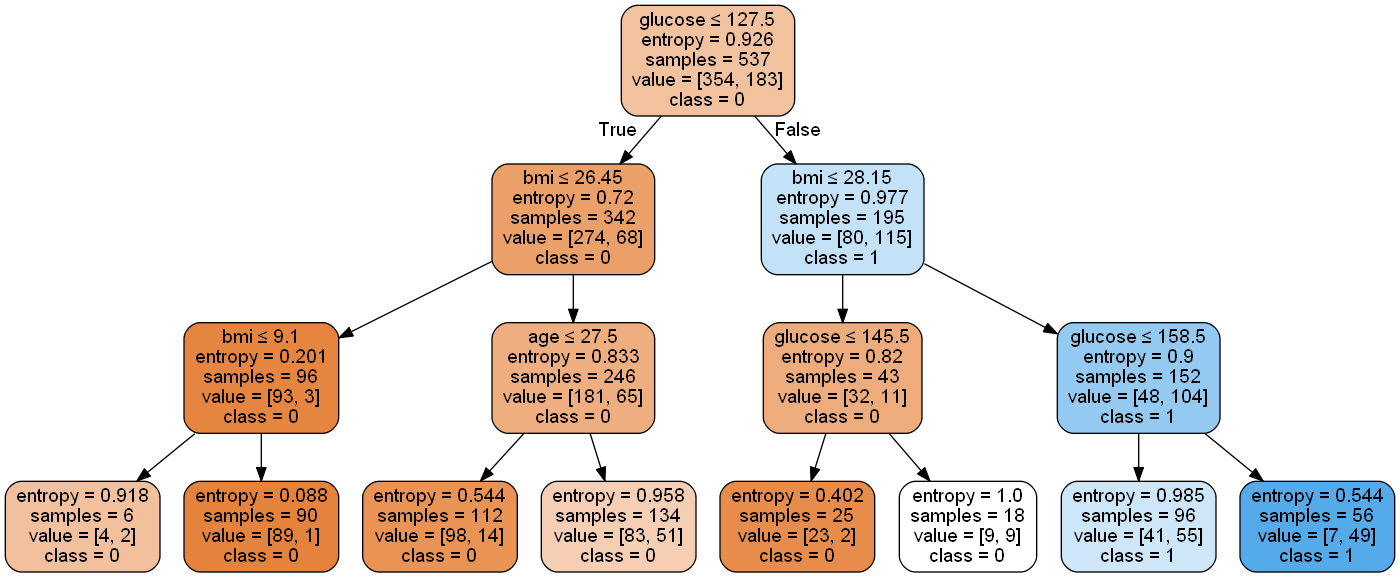

In [17]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### The output should be :
![alt text](output2.png)

<center> Ce modèle est moins complexe, explicable et facile à comprendre que le diagramme du modèle d'arbre de décision précédent.

***
## <font color="red"> Pros

##### <font color="green"> Certains avantages des arbres de décision sont:

* Simple à comprendre et à interpréter. 
* Les arbres peuvent être visualisés.

* Nécessite peu de préparation des données. D'autres techniques nécessitent souvent une normalisation des données, des variables factices doivent être créées et des valeurs vides supprimées. Notez cependant que ce module ne prend pas en charge les valeurs manquantes.

* Le coût d'utilisation de l'arbre (c'est-à-dire la prédiction des données) est logarithmique dans le nombre de points de données utilisés pour entraîner l'arbre.

* Capable de gérer des données numériques et catégoriques. D'autres techniques sont généralement spécialisées dans l'analyse d'ensembles de données qui n'ont qu'un seul type de variable. Voir les algorithmes pour plus d'informations.

* Capable de gérer les problèmes multi-sorties.

* Utilise un modèle de boîte blanche. Si une situation donnée est observable dans un modèle, l'explication de la condition est facilement expliquée par la logique booléenne. En revanche, dans un modèle de boîte noire (par exemple, dans un réseau de neurones artificiels), les résultats peuvent être plus difficiles à interpréter.

* Possibilité de valider un modèle à l'aide de tests statistiques. Cela permet de rendre compte de la fiabilité du modèle.

***


## <font color="red"> Cons


##### <font color="green">Les inconvénients des arbres de décision comprennent:

* Les apprenants de l'arbre de décision peuvent créer des arbres trop complexes qui ne généralisent pas bien les données. C'est ce qu'on appelle le surajustement. Des mécanismes tels que l'élagage, la définition du nombre minimum d'échantillons requis au niveau d'un nœud feuille ou la définition de la profondeur maximale de l'arbre sont nécessaires pour éviter ce problème.

* Les arbres de décision peuvent être instables car de petites variations dans les données peuvent entraîner la génération d'un arbre complètement différent. Ce problème est atténué en utilisant des arbres de décision au sein d'un ensemble.

* Le problème de l'apprentissage d'un arbre de décision optimal est connu pour être NP-complet sous plusieurs aspects d'optimalité et même pour des concepts simples. Par conséquent, les algorithmes pratiques d'apprentissage d'arbre de décision sont basés sur des algorithmes heuristiques tels que l'algorithme glouton où des décisions localement optimales sont prises à chaque nœud. De tels algorithmes ne peuvent garantir de renvoyer l'arbre de décision globalement optimal. Cela peut être atténué en formant plusieurs arbres dans un apprenant d'ensemble, où les caractéristiques et les échantillons sont échantillonnés au hasard avec remplacement.
***

### Conclusion

on conclure que Ce processus de classification du pima dans un groupe de glucose potentiel, bmi, âge est connu comme un problème de classification. La classification est un processus en deux étapes, une étape d'apprentissage et une étape de prédiction. Lors de l'étape d'apprentissage, le modèle est développé sur la base de données d'entraînement données. Dans l'étape de prédiction, le modèle est utilisé pour prédire la réponse pour des données données. L'arbre de décision est l'un des algorithmes de classification les plus simples et les plus populaires à comprendre et à interpréter. Il peut être utilisé à la fois pour le type de problème de classification et de régression